In [1]:
##相应的包
import wfdb
import numpy as np
import pywt
import pickle as pk
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
#关键变量
PATH = "D:/lzy/mit-bih-arrhythmia-database-1.0.0/" 

data_names = ['100', '101', '102', '103', '104', '105', '106', '107', 
              '108', '109', '111', '112', '113', '114', '115', '116', 
              '117', '118', '119', '121', '122', '123', '124', '200', 
              '201', '202', '203', '205', '207', '208', '209', '210', 
              '212', '213', '214', '215', '217', '219', '220', '221', 
              '222', '223', '228', '230', '231', '232', '233', '234']


In [3]:

# 画心电图
def draw_ecg(x):
    plt.plot(x)
    plt.title('Raw_ECG')
    plt.show()
    
#画心电图及其R波位置
def draw_ecg_R(record,annotation):
    plt.plot(record.p_signal[:1500]) #绘制心电信号
    R_v=record.p_signal[:1500][annotation.sample[annotation.sample<1500]] #获取R波峰值
    plt.plot(annotation.sample[annotation.sample<1500],R_v,'or')#绘制R波
    plt.title('Raw_ECG And R Position')
    plt.show()
def selData(record,annotation,label,R_left):
    a=annotation.symbol
    f=[k for k in range(len(a)) if a[k]==label] #找到对应标签R波位置索引
    signal=record.p_signal
    R_pos=annotation.sample[f]
    res=[]
    for i in range(len(f)):
        if(R_pos[i]-R_left>0):
            res.append(signal[R_pos[i]-R_left:R_pos[i]-R_left+250])
    return res
        
# 读取心电图数据
def read_ecg_data(filePath,channel_names):
    '''
    读取心电信号文件
    sampfrom: 设置读取心电信号的 起始位置，sampfrom=0表示从0开始读取，默认从0开始
    sampto：设置读取心电信号的 结束位置，sampto = 1500表示从1500出结束，默认读到文件末尾
    channel_names：设置设置读取心电信号名字，必须是列表，channel_names=['MLII']表示读取MLII导联线
    channels：设置读取第几个心电信号，必须是列表，channels=[0, 3]表示读取第0和第3个信号，注意信号数不确定 
    record = wfdb.rdrecord('../ecg_data/102', sampfrom=0, sampto = 1500) # 读取所有通道信号
    record = wfdb.rdrecord('../ecg_data/203', sampfrom=0, sampto = 1500,channel_names=['MLII']) # 仅仅读取“MLII”信号
    record = wfdb.rdrecord('../ecg_data/101', sampfrom=0, sampto=3500, channels=[0]) # 仅仅读取第0个信号（MLII）
    print(type(record)) # 查看record类型
    print(dir(record)) # 查看类中的方法和属性
    print(record.p_signal) # 获得心电导联线信号，本文获得是MLII和V1信号数据
    print(record.n_sig) # 查看导联线条数
    print(record.sig_name) # 查看信号名称（列表），本文导联线名称['MLII', 'V1']
    print(record.fs) # 查看采用率
    '''
    
    record = wfdb.rdrecord(filePath,channel_names=[channel_names])
    print('导联线条数:')
    print(record.n_sig) # 查看导联线条数
    print('信号名称（列表）')
    print(record.sig_name) # 查看信号名称（列表），本文导联线名称['MLII', 'V1']
 
    '''
    读取注解文件
    sampfrom: 设置读取心电信号的 起始位置，sampfrom=0表示从0开始读取，默认从0开始
    sampto：设置读取心电信号的 结束位置，sampto = 1500表示从1500出结束，默认读到文件末尾
    print(type(annotation)) # 查看annotation类型
    print(dir(annotation))# 查看类中的方法和属性
    print(annotation.sample) # 标注每一个心拍的R波的尖锋位置，与心电信号对应
    annotation.symbol  #标注每一个心拍的类型N，L，R等等
    print(annotation.ann_len) # 被标注的数量
    print(annotation.record_name) # 被标注的文件名
    print(wfdb.show_ann_labels()) # 查看心拍的类型
    '''
    annotation = wfdb.rdann(filePath, 'atr')
#     print(annotation.symbol)
    return record,annotation



In [4]:
r = wfdb.rdrecord(PATH+"100")
ann = wfdb.rdann(PATH+"100",'atr',return_label_elements=['label_store','symbol'])

In [5]:
ann.symbol

['+',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'A',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N'

In [6]:
record,annotation=read_ecg_data(PATH+"100",'V5')

导联线条数:
1
信号名称（列表）
['V5']


In [7]:
annotation.sample.shape

(2274,)

In [8]:
annotation.sample[annotation.sample<1500]

array([  18,   77,  370,  662,  946, 1231])

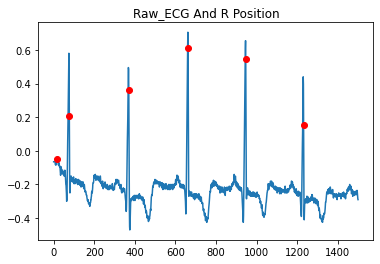

In [9]:
draw_ecg_R(record,annotation)

In [12]:
r.p_signal[:,0]

array([-0.145, -0.145, -0.145, ..., -0.675, -0.765, -1.28 ])

In [13]:
print(dir(r))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adjust_datetime', '_arrange_fields', 'adc', 'adc_gain', 'adc_res', 'adc_zero', 'base_counter', 'base_date', 'base_time', 'baseline', 'block_size', 'byte_offset', 'calc_adc_params', 'calc_checksum', 'check_field', 'check_field_cohesion', 'check_read_inputs', 'check_sig_cohesion', 'checksum', 'comments', 'convert_dtype', 'counter_freq', 'd_signal', 'dac', 'e_d_signal', 'e_p_signal', 'file_name', 'fmt', 'fs', 'get_write_fields', 'get_write_subset', 'init_value', 'n_sig', 'p_signal', 'record_name', 'samps_per_frame', 'set_d_features', 'set_default', 'set_defaults', 'set_p_features', 'sig_len', 'sig_name', 'skew', 'smooth_frames', 'units', 'wr_dat_fi

In [16]:
r.sig_name

['MLII', 'V5']

In [17]:
r.p_signal[:,0].shape

(650000,)

In [18]:
r.fs

360

In [47]:
for file in data_names:
    r = wfdb.rdrecord(PATH+file,sampfrom=0,sampto=10)
    print(r.sig_name)

['MLII', 'V5']
['MLII', 'V1']
['V5', 'V2']
['MLII', 'V2']
['V5', 'V2']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['V5', 'MLII']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V2']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V5']
['MLII', 'V4']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']
['MLII', 'V1']


In [51]:
r = wfdb.rdrecord(PATH+"100",channel_names=['V5'])
data = r.p_signal.flatten()
coeffs=pywt.wavedec(data=data,wavelet='db5',level=9)
cA9, cD9, cD8, cD7, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

In [52]:
cA9

array([-1.53804717, -1.49324118, -1.48288677, ..., -4.22481025,
       -3.66728945,  0.24111425])

In [53]:
threshold = (np.median(np.abs(cD1)) / 0.6745) * (np.sqrt(2 * np.log(len(cD1))))
# 将高频信号cD1、cD2置零
cD1.fill(0)
cD2.fill(0)
# 将其他中低频信号按软阈值公式滤波
for i in range(1, len(coeffs) - 2):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)


In [54]:
rdata = pywt.waverec(coeffs=coeffs, wavelet='db5')

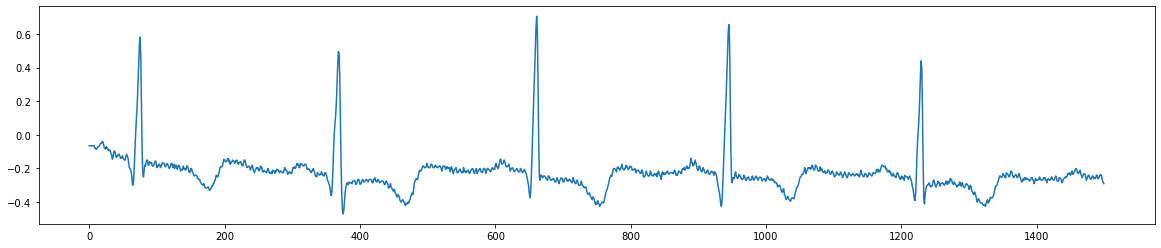

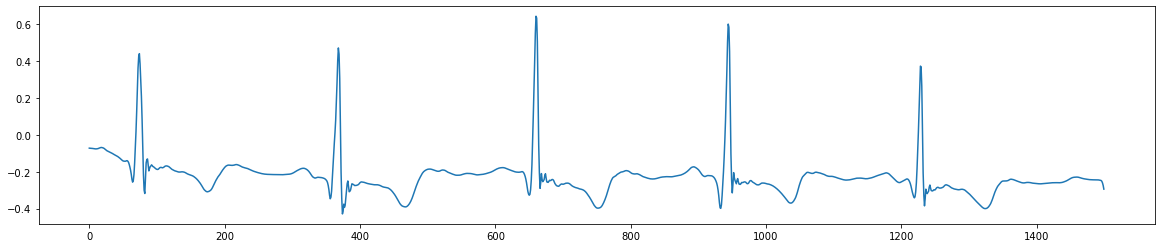

In [57]:
plt.figure(figsize=(20, 4))
plt.plot(data[:1500])
plt.show()
plt.figure(figsize=(20, 4))
plt.plot(rdata[:1500])
plt.show()